**KNN ALGORITHM**

In [3]:
import os
import numpy as np
import pandas as pd

In [4]:
path_to_csv_data=os.path.join(os.path.dirname(os.getcwd()),'csv_data','Iris.csv')
                                              

In [5]:
print(path_to_csv_data)

C:\Users\Acer\csv_data\Iris.csv


In [10]:
iris_df=pd.read_csv('Iris.csv')
iris_df

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  Iris-virginica  
146  Iris-virginica  
147  Iris-virginica  
148  Iris-virginica  
149  Iris-virginica  

[150 rows x 6 columns]

In [11]:
iris_df.drop('Id', axis=1, inplace=True)
iris_df.head()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa

In [12]:
data = iris_df.drop('Species', axis=1)
labels = iris_df['Species']

In [13]:
print(data.shape)
print(labels.shape)

(150, 4)
(150,)


**TRAIN TEST SPLITTING**

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42,
                                                   stratify = labels)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


**Feature Scaling**

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
X_test.head()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
38             4.4           3.0            1.3           0.2
127            6.1           3.0            4.9           1.8
57             4.9           2.4            3.3           1.0
93             5.0           2.3            3.3           1.0
42             4.4           3.2            1.3           0.2

In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
knn = KNeighborsClassifier(3)

In [21]:
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [23]:
predictions = knn.predict(X_test_scaled)

In [24]:
test_vs_pred_df = pd.DataFrame({"actual": y_test,
                               "pred": predictions})
test_vs_pred_df.head()

actual             pred
38       Iris-setosa      Iris-setosa
127   Iris-virginica   Iris-virginica
57   Iris-versicolor  Iris-versicolor
93   Iris-versicolor  Iris-versicolor
42       Iris-setosa      Iris-setosa

In [25]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [26]:
confusion_matrix(y_test, predictions)

array([[10,  0,  0],
       [ 0, 10,  0],
       [ 0,  1,  9]], dtype=int64)

In [27]:
print(classification_report(y_test, predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.91      1.00      0.95        10
 Iris-virginica       1.00      0.90      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



**Optimum value of k**

score_dict = {}
for k in range(3, 22, 2):
    knn = KNeighborsClassifier(k) 
    knn.fit(X_train_scaled, y_train)
    predictions = knn.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, predictions)
    if k not in score_dict:
        score_dict[k] = accuracy

In [29]:
score_dict

{3: 0.9666666666666667,
 5: 0.9666666666666667,
 7: 1.0,
 9: 0.9666666666666667,
 11: 0.9666666666666667,
 13: 0.9333333333333333,
 15: 0.9666666666666667,
 17: 0.9666666666666667,
 19: 0.9666666666666667,
 21: 0.9666666666666667}

**KNN For Regression**

In [31]:
path_to_admission_data = os.path.join(os.path.dirname(os.getcwd()), 'csv_data', 'Admission_data.csv')
print(path_to_admission_data)

C:\Users\Acer\csv_data\Admission_data.csv


In [33]:
admission_df = pd.read_csv('Admission_data.csv')
admission_df.head()

Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  Chance of Admit   
0         1              0.92  
1         1              0.76  
2         1              0.72  
3         1              0.80  
4         0              0.65

In [34]:
admission_df.drop('Serial No.', axis=1, inplace=True)
print(admission_df.shape)

(500, 8)


In [35]:
admission_df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

**Separate data & labels**

In [36]:
data = admission_df.drop('Chance of Admit ', axis=1)
labels = admission_df["Chance of Admit "]

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42
                                                   )

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(400, 7)
(100, 7)
(400,)
(100,)


In [39]:
X_train

GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research
249        321          111                  3  3.5   4.0  8.83         1
433        316          111                  4  4.0   5.0  8.54         0
19         303          102                  3  3.5   3.0  8.50         0
322        314          107                  2  2.5   4.0  8.27         0
332        308          106                  3  3.5   2.5  8.21         1
..         ...          ...                ...  ...   ...   ...       ...
106        329          111                  4  4.5   4.5  9.18         1
270        306          105                  2  2.5   3.0  8.22         1
348        302           99                  1  2.0   2.0  7.25         0
435        309          105                  2  2.5   4.0  7.68         0
102        314          106                  2  4.0   3.5  8.25         0

[400 rows x 7 columns]

**Feature Scaling**

In [41]:
from sklearn.preprocessing import MinMaxScaler

In [43]:
scaler = MinMaxScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[list(X_train.columns)[:-1]] = scaler.fit_transform(X_train_scaled[list(X_train_scaled.columns)[:-1]])
X_test_scaled[list(X_test_scaled.columns)[:-1]] = scaler.fit_transform(X_test_scaled[list(X_test_scaled.columns)[:-1]])

In [44]:
X_test_scaled

GRE Score  TOEFL Score  University Rating    SOP   LOR       CGPA  \
361       0.88     0.851852               0.75  0.750  0.625  0.894309   
73        0.48     0.555556               0.75  0.875  0.750  0.691057   
374       0.50     0.444444               0.25  0.250  0.375  0.126016   
155       0.44     0.592593               0.50  0.500  0.500  0.548780   
104       0.72     0.703704               0.50  0.625  0.500  0.695122   
..         ...          ...                ...    ...    ...       ...   
347       0.18     0.037037               0.00  0.000  0.000  0.000000   
86        0.50     0.481481               0.50  0.875  0.625  0.439024   
75        0.78     0.777778               0.25  0.250  0.750  0.495935   
438       0.56     0.629630               0.00  0.375  0.625  0.487805   
15        0.48     0.444444               0.50  0.625  0.375  0.390244   

     Research  
361         1  
73          1  
374         0  
155         0  
104         1  
..        ...  
347         0  
86          0  
75          1  
438         1  
15          0  

[100 rows x 7 columns]

In [45]:
from sklearn.neighbors import KNeighborsRegressor

In [47]:
knn = KNeighborsRegressor(5)

In [48]:
knn.fit(X_train_scaled, y_train)

KNeighborsRegressor()

In [49]:
predictions = knn.predict(X_test_scaled)

In [50]:
test_vs_pred_df = pd.DataFrame({"actual": y_test,
                               "pred": predictions})

test_vs_pred_df

actual   pred
361    0.93  0.908
73     0.84  0.746
374    0.39  0.598
155    0.77  0.684
104    0.74  0.796
..      ...    ...
347    0.42  0.472
86     0.72  0.714
75     0.72  0.774
438    0.67  0.682
15     0.54  0.648

[100 rows x 2 columns]

In [51]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [52]:
print("Mean absolute error is ", mean_absolute_error(y_test, predictions))
print("Mean sqaured error is ", mean_squared_error(y_test, predictions))
print("Root Mean squared error is ", mean_squared_error(y_test, predictions, squared=False))
print("R2 score is ", r2_score(y_test, predictions))

Mean absolute error is  0.050379999999999994
Mean sqaured error is  0.0044589999999999986
Root Mean squared error is  0.06677574409918619
R2 score is  0.781955990220049


In [53]:
reg_score_dict = {}
for k in range(3, 52, 2):
    knn = KNeighborsRegressor(k)
    knn.fit(X_train_scaled, y_train)
    predictions = knn.predict(X_test_scaled)
    r2 = r2_score(y_test, predictions)
    if k not in reg_score_dict:
        reg_score_dict[k] = r2

In [54]:
reg_score_dict

{3: 0.7507633795164359,
 5: 0.781955990220049,
 7: 0.7897560001995909,
 9: 0.7868978840290983,
 11: 0.7719210329568187,
 13: 0.7662733467397753,
 15: 0.7746323281716927,
 17: 0.7804544800805409,
 19: 0.7742005702713869,
 21: 0.780112768823911,
 23: 0.7819612591918137,
 25: 0.7829774865525672,
 27: 0.791816971367818,
 29: 0.7886075780084832,
 31: 0.7874332207943537,
 33: 0.7873786991946583,
 35: 0.7899102439998005,
 37: 0.7898660346727485,
 39: 0.7869897394102773,
 41: 0.7842588748983681,
 43: 0.7819637126260015,
 45: 0.7793834284161913,
 47: 0.7769200901845198,
 49: 0.7738244761504223,
 51: 0.7695366555462496}

In [56]:
import matplotlib.pyplot as plt

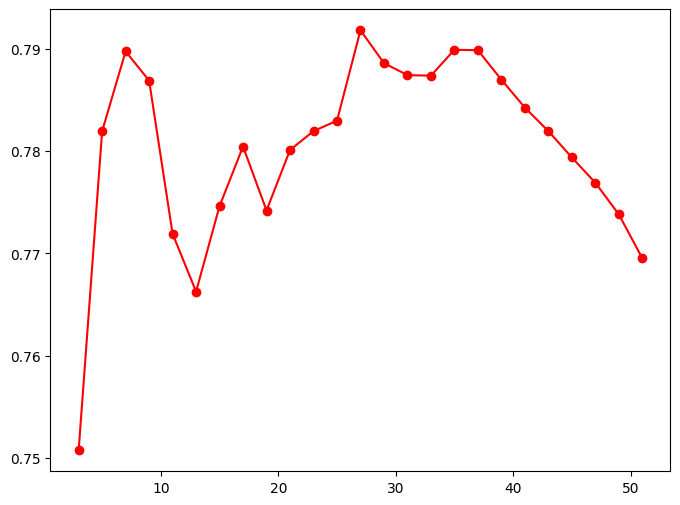

In [57]:
plt.figure(figsize=(8, 6))
plt.plot(reg_score_dict.keys(), reg_score_dict.values(), marker = "o",
        color = "red")
plt.show()